<a href="https://colab.research.google.com/github/ericyun95/section1project/blob/main/AI-16-%EC%9C%A4%ED%98%84%EC%9B%85-section1project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
files.upload();

Saving vgames2.csv to vgames2.csv


In [ ]:
df = pd.read_csv('vgames2.csv')

In [ ]:
df.drop(df[df.duplicated()].index, axis = 0, inplace = True)

In [ ]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.drop(df[df.Year.isnull() | df.Genre.isnull() | df.Publisher.isnull()].index, axis = 0, inplace = True)

In [ ]:
df = df.iloc[:,1:].reset_index(drop = True)

In [ ]:
df.Year = df.Year.astype(int)

In [ ]:
def yearpatch(x):
  if x>0 and x <= 20: 
    return int(2000+x)
  else:
    return int(x)

df.Year = df.Year.apply(yearpatch)

In [ ]:
df = df[df.Year > 1985]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16089 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16089 non-null  object
 1   Platform     16089 non-null  object
 2   Year         16089 non-null  int64 
 3   Genre        16089 non-null  object
 4   Publisher    16089 non-null  object
 5   NA_Sales     16089 non-null  object
 6   EU_Sales     16089 non-null  object
 7   JP_Sales     16089 non-null  object
 8   Other_Sales  16089 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
# 현재까지 결측치 제거, 연도 이상치 제거

In [ ]:
df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [ ]:
test = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for item in test:
  df[item] = df[item].str.replace(pat = r'[^0-9]', repl = r'', regex = True).astype(int)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17,0,0,1
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,2,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12,9,0,4


In [ ]:
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [ ]:
df.query("Year > 2010 and Year <= 2015").groupby(['Year', 'Genre']).sum()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total
Year Genre                                                         
2011 Action            4860      3546      1010         1152  10568
     Adventure          535       460       351          152   1498
     Fighting          1068       512       365          212   2157
     Misc              3036      1341       429          492   5298
     Platform          1234       886       349          271   2740
     Puzzle             150       264        77           46    537
     Racing            1416      1306       312          363   3397
     Role-Playing      1888      1374      1308          483   5053
     Shooter           4820      5277       269         1054  11420
     Simulation         551       510       123          131   1315
     Sports            4023      1869       290          703   6885
     Strategy           312       272       181           86    851
2012 Action            5024      6188      1513         1315  14040
     Adventure          142       131       228           44    545
     Fighting           830       234       125           79   1268
     Misc              1018       609       366          165   2158
     Platform           642       469       384          143   1638
     Puzzle              12        42        69            6    129
     Racing             393       677        20          227   1317
     Role-Playing      2172      1143      1358          365   5038
     Shooter           3488      2202       280          873   6843
     Simulation         300       290       586           80   1256
     Sports            1370       820       232          281   2703
     Strategy            94        90        84           20    288
2013 Action            4938      4638      1052         1479  12107
     Adventure          163       170       249           79    661
     Fighting           309       195        83           82    669
     Misc              1226       750       358          205   2539
     Platform          1099      1656       172          239   3166
     Puzzle              10        48        25            8     91
     Racing            1915       470        18          474   2877
     Role-Playing       693       417      1534          221   2865
     Shooter           4492      2279       164          715   7650
     Simulation         226       338       220           66    850
     Sports            1630      1426       170          541   3767
     Strategy           959       238        82          235   1514
2014 Action            3198      3850       623         1132   8803
     Adventure          167       238       127           68    600
     Fighting           671       343       471          139   1624
     Misc               907       887       227          289   2310
     Platform           284       363       126           96    869
     Puzzle              62        37        41           10    150
     Racing             541       761       146          169   1617
     Role-Playing      1329      1060      1699          311   4399
     Shooter           2694      2635        99          829   6257
     Simulation         122       344        37           51    554
     Sports            1721      1816       151          616   4304
     Strategy            16        22        55            4     97
2015 Action            2291      2263      1511          634   6699
     Adventure          267       336       122           76    801
     Fighting           234       220        79          101    634
     Misc               463       299       201           95   1058
     Platform           250       217       129           18    614
     Puzzle               5        11        52            1     69
     Racing             170       465        28           93    756
     Role-Playing      1236      1000       698          772   3706
     Shooter           3016      2288       269          841   6414
     Si

In [ ]:
df.query("Year >= 2010 and Year <= 2015").groupby(['Platform', 'Year']).sum()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total
Platform Year                                                  
3DS      2011      2545      1851      1235          420   6051
         2012      1596      1096      1947          255   4894
         2013       863      1200      1729          161   3953
         2014      1203       851      2046          184   4284
         2015       582       378      1557           90   2607
DS       2010      4065      1782      1959          600   8406
         2011      1439       627       418          193   2677
         2012       553       302       363           63   1281
         2013        72        98         0           17    187
         2014         2         0         0            0      2
PC       2010       886      1154         0          319   2359
         2011      1007      1903         0          536   3446
         2012       750      1137         0          310   2197
         2013      1113       644         0          369   2126
         2014       340       808         0          131   1279
         2015       148       510         0           46    704
PS2      2010       160       152        60          113    485
         2011        13        13         9           10     45
PS3      2010      5615      5125      1005         2063  13808
         2011      7335      5208      1311         2119  15973
         2012      3693      6118      1086         1609  12506
         2013      3798      4403      1140         2230  11571
         2014      1522      2561       623          778   5484
         2015       458       698       355          235   1746
PS4      2013      2584      1099        93          275   4051
         2014      2608      4066       283         1558   8515
         2015      3949      4931       557         2083  11520
PSP      2010       731       506      1717          401   3355
         2011       187       136      1276           95   1694
         2012        13        26       668            5    712
         2013         0        19       410            7    436
         2014         0         0        24            0     24
         2015         0         0        12            0     12
PSV      2011       154       162        71           79    466
         2012       971       545       249          260   2025
         2013       331       288       387          212   1218
         2014       303       375       569          219   1466
         2015        54       110       486           48    698
Wii      2010      6820      3568       584          952  11924
         2011      3104      1623       558          494   5779
         2012      1146       594       613          159   2512
         2013       491       352         5           63    911
         2014       182       207         0           18    407
         2015        57        87         0            3    147
WiiU     2012       895       408       213          128   1644
         2013       925      1173       318          125   2541
         2014      1015       694       235          175   2119
         2015       623       445       341          102   1511
X360     2010     10118      4238       211         1358  15925
         2011      8109      6094       186         1199  15588
         2012      5868      2669       106          809   9452
         2013      4899      2820        43          735   8497
         2014      1865      1199         8          273   3345
         2015       711       414         0           96   1221
XOne     2013      2584       529         2          150   3265
         2014      2672      1595        14          378   4659
         2015      3276      1634        17          514   5441

In [ ]:
df_2 = df[df.Year >= 2010]

In [ ]:
df_3 = df_2[df_2.Year <2016]

In [ ]:
df_3.shape

(4774, 10)

In [ ]:
len(df_3.Platform.unique())

12

In [ ]:
len(df_3.Genre.unique())

12

In [ ]:
len(df_3.Publisher.unique())

250

In [ ]:
a = df_3.groupby(['Year','Genre']).sum()

In [ ]:
c = df_3.groupby(['Year','Platform']).sum()

In [ ]:
b = a.reset_index()

In [ ]:
d = c.reset_index()

In [ ]:
b

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,2010,Action,5267,3332,795,1231,10625
1,2010,Adventure,567,515,358,100,1540
2,2010,Fighting,557,395,152,168,1272
3,2010,Misc,5336,2646,393,753,9128
4,2010,Platform,1689,720,368,259,3036
...,...,...,...,...,...,...,...
67,2015,Role-Playing,1236,1000,698,772,3706
68,2015,Shooter,3016,2288,269,841,6414
69,2015,Simulation,95,134,149,39,417
70,2015,Sports,1774,1876,72,535,4257


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


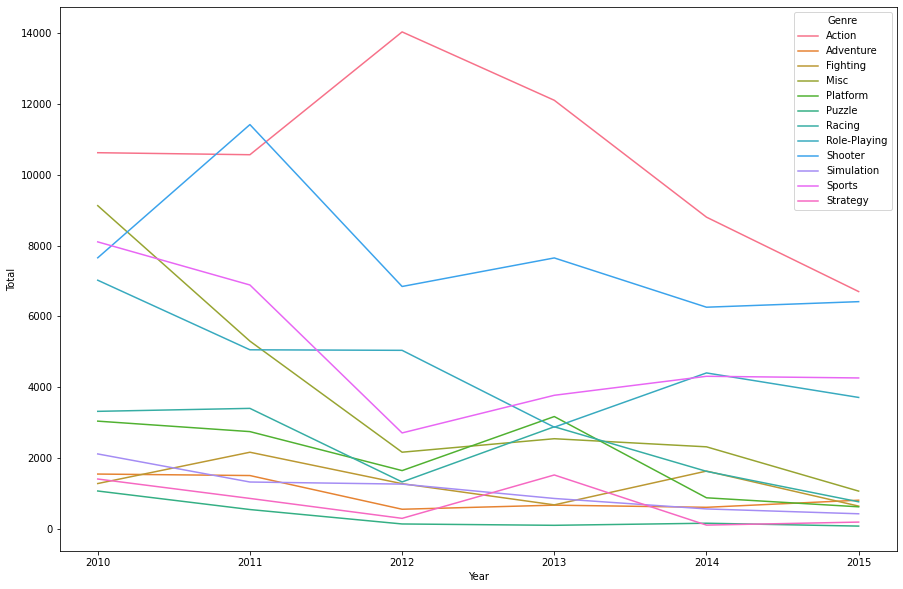

In [ ]:
plt.figure(figsize = (15,10))
sns.lineplot(b.Year, b.Total, hue = b.Genre, alpha = 1)

In [ ]:
d

,Year,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,2010,DS,4065,1782,1959,600,8406
1,2010,PC,886,1154,0,319,2359
2,2010,PS2,160,152,60,113,485
3,2010,PS3,5615,5125,1005,2063,13808
4,2010,PSP,731,506,1717,401,3355
5,2010,Wii,6820,3568,584,952,11924
6,2010,X360,10118,4238,211,1358,15925
7,2011,3DS,2545,1851,1235,420,6051
8,2011,DS,1439,627,418,193,2677
9,2011,PC,1007,1903,0,536,3446


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


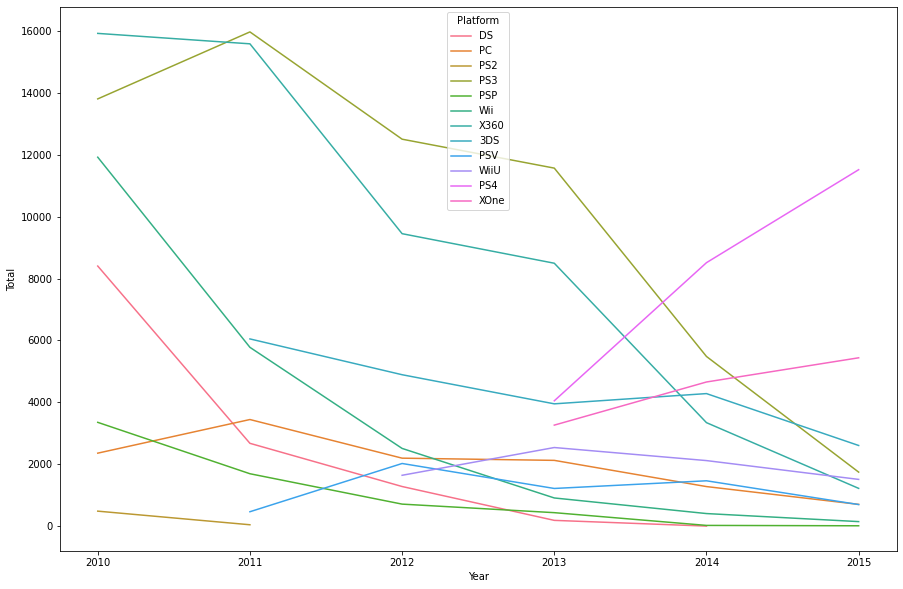

In [ ]:
plt.figure(figsize = (15,10))
sns.lineplot(d.Year, d.Total, hue = d.Platform, alpha = 1)

In [ ]:
e = b.groupby('Genre').sum()

In [ ]:
e.reset_index(inplace = True)

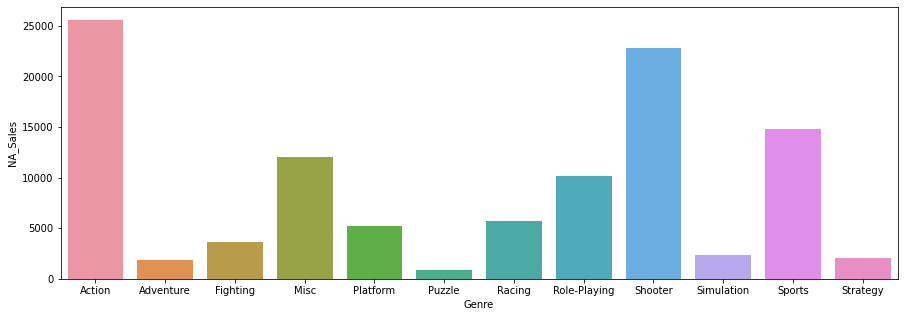

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = e.Genre, y = e.NA_Sales, data = e)

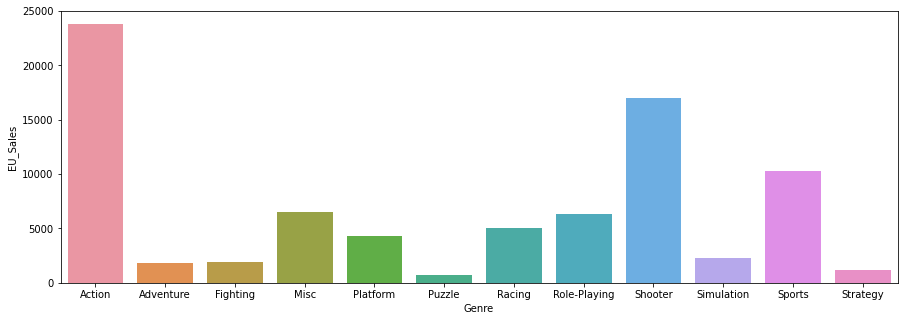

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = e.Genre, y = e.EU_Sales, data = e)

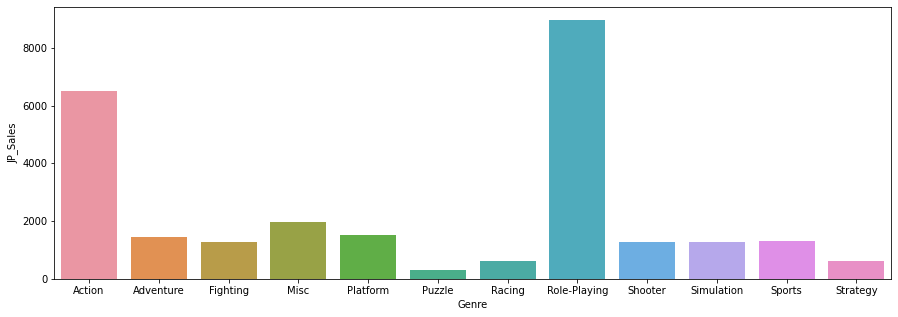

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = e.Genre, y = e.JP_Sales, data = e)

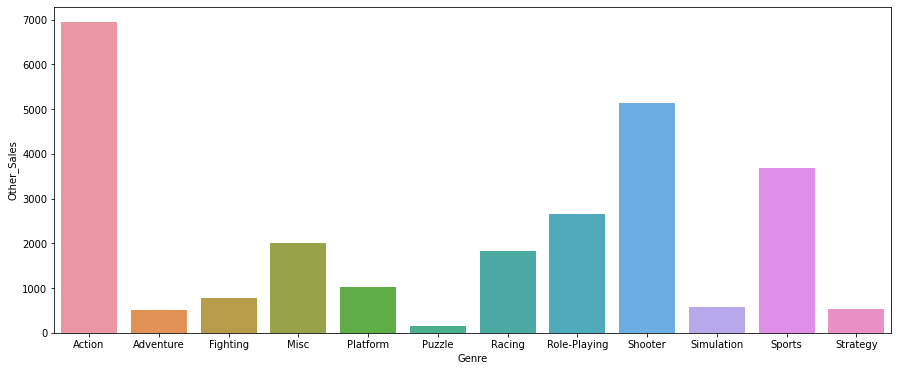

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x = e.Genre, y = e.Other_Sales, data = e)

In [ ]:
f = d.groupby('Platform').sum()

In [ ]:
f.reset_index(inplace = True)

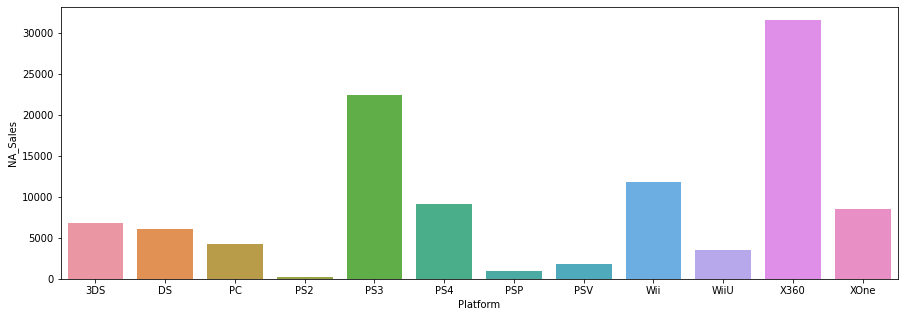

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = f.Platform, y = f.NA_Sales, data = f)

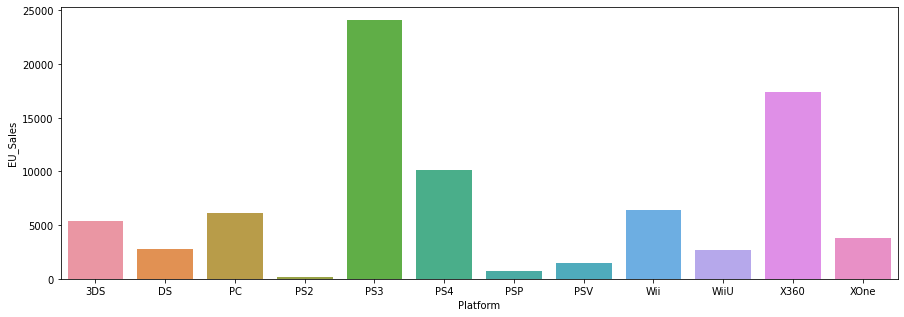

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = f.Platform, y = f.EU_Sales, data = f)

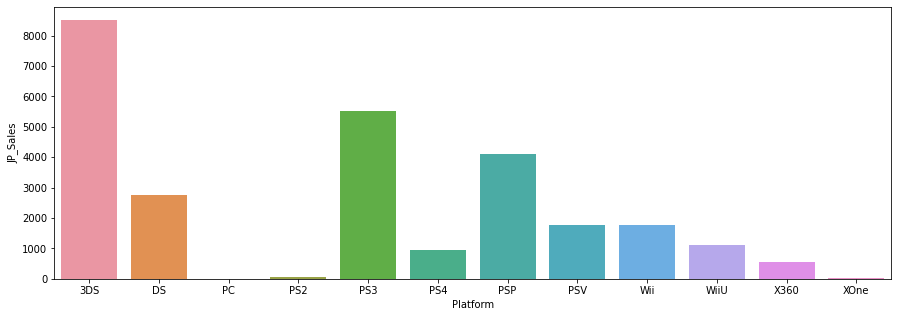

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = f.Platform, y = f.JP_Sales, data = f)

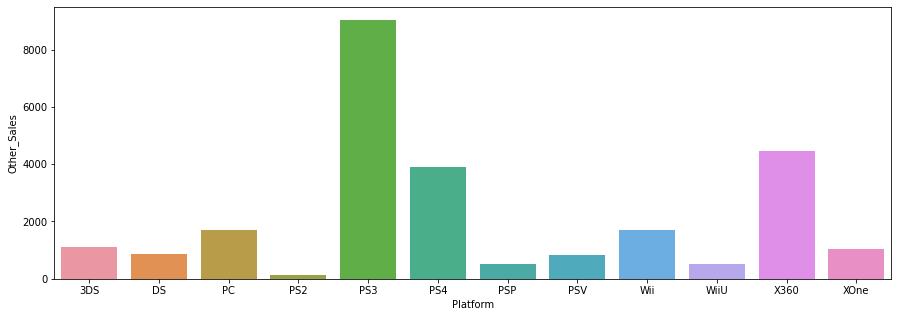

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = f.Platform, y = f.Other_Sales, data = f)

In [ ]:
toptier = list(df_3.groupby('Name').sum().reset_index().sort_values('Total', ascending = False).head(10).Name)

In [ ]:
df_3.groupby('Name').sum().reset_index().sort_values('Total', ascending = False)[['Name', 'Total']].head(10)

,Name,Total
941,Grand Theft Auto V,5250
297,Call of Duty: Ghosts,4339
141,Assassin's Creed III,3614
195,Battlefield 3,3555
298,Call of Duty: Modern Warfare 3,3030
294,Call of Duty: Black Ops,2941
296,Call of Duty: Black Ops II,2586
295,Call of Duty: Black Ops 3,2530
1566,Minecraft,2331
1280,Kinect Adventures!,2182


In [ ]:
tt1 = df_3[df_3.Name == toptier[0]]

In [ ]:
tt2 = df_3[df_3.Name == toptier[1]]

In [ ]:
tt3 = df_3[df_3.Name == toptier[2]]

In [ ]:
tt4 = df_3[df_3.Name == toptier[3]]

In [ ]:
tt5 = df_3[df_3.Name == toptier[4]]

In [ ]:
tt_con = pd.concat([tt1, tt2, tt3, tt4, tt5])

In [ ]:
tt_con

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
1973,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,38,581,36,202,857
3414,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,701,927,97,414,2139
10619,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,266,201,0,41,508
10695,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,963,531,6,138,1638
16219,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,36,64,0,8,108
854,Call of Duty: Ghosts,PC,2013,Shooter,Activision,23,41,0,9,73
5489,Call of Duty: Ghosts,X360,2013,Shooter,Activision,672,263,4,82,1021
5557,Call of Duty: Ghosts,WiiU,2013,Shooter,Activision,23,9,1,3,36
6740,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,409,373,38,138,958
9602,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,1780,142,5,38,1965
